In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import jieba.posseg as psg
from tqdm.notebook import tqdm_notebook
from wordcloud import WordCloud
from gensim import corpora, models

In [201]:
plt.rcParams['font.family']=['Heiti TC']
plt.rcParams['figure.figsize']=(20,10)

In [202]:
reviews = pd.read_csv('tutorial/chapter12/demo/data/reviews.csv')

In [203]:
reviews.head()

,content,creationTime,nickname,referenceName,content_type
0,东西收到这么久，都忘了去好评，美的大品牌，值得信赖，东西整体来看，个人感觉还不错，没有出现什...,2017-04-17 13:01:54,鑫***辰,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
1,安装师傅很给力，热水器也好用，感谢美的。,2017-04-17 10:45:33,切***药,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
2,还没安装，基本满意,2017-04-17 10:58:33,j***x,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
3,电热水器收到了，京东自营商品就是好，发货速度快，品质有保障，安装效果好，宝贝非常喜欢，冬天可...,2017-10-18 20:22:33,j***2,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos
4,用了几次才来评价，对产品非常满意，加热快保温时间长，售后服务特别好，主动打电话询问送货情况帮...,2017-04-17 09:19:16,j***6,美的（Midea）60升预约洗浴 无线遥控 电热水器 F60-15WB5(Y),pos


In [204]:
reviews = reviews[['content','content_type']].drop_duplicates()

In [205]:
content = reviews.content

In [206]:
strinfo = re.compile('[0-9a-zA-Z]|京东|美的|热水器|电热水器')

In [207]:
content=content.apply(lambda s : strinfo.sub('',s))

In [208]:
segmenter = lambda s : [(x.word,x.flag) for x in psg.cut(s)]
seg_word = content.apply(segmenter)

In [209]:
n_word = seg_word.apply(lambda x : len(x))

In [210]:
n_content = [[x+1]*y for x,y in zip(list(seg_word.index),list(n_word))]

In [211]:
seg_word

0       [(东西, ns), (收到, v), (这么久, r), (，, x), (都, d), ...
1       [(安装, v), (师傅, nr), (很, d), (给, p), (力, n), (，...
2       [(还, d), (没, v), (安装, v), (，, x), (基本, n), (满意...
3       [(收到, v), (了, ul), (，, x), (自营, vn), (商品, n), ...
4       [(用, p), (了, ul), (几次, m), (才, d), (来, v), (评价...
                              ...                        
1995    [(差, a), (评, n), (，, x), (差, a), (的, uj), (一塌糊...
1996    [(还, d), (没有, v), (安装, v), (，, x), (就, d), (搞,...
1997      [(好不容易, l), (网购, n), (一下, m), (还, d), (漏电, nz)]
1998    [(东西, ns), (送, v), (的, uj), (挺快, v), (，, x), (...
1999    [(买, v), (了, ul), (两个, m), (，, x), (送到, v), (一...
Name: content, Length: 1974, dtype: object

In [212]:
n_word

0       32
1       11
2        6
3       39
4       44
        ..
1995    13
1996    36
1997     5
1998    16
1999    13
Name: content, Length: 1974, dtype: int64

In [213]:
index_content = sum(n_content,[])

In [214]:
seg_word = sum(seg_word,[])

In [215]:
word = [w[0] for w in seg_word]
nature = [w[1] for w in seg_word]

In [216]:
content_type = [[x]*y for x,y in zip(list(reviews['content_type']),list(n_word))]

In [217]:
content_type = sum(content_type,[])

In [218]:
result = pd.DataFrame({"index_content":index_content,"word":word,"nature":nature,"content_type":content_type})

In [219]:
result = result[result.nature!='x']

In [220]:
with open('tutorial/chapter12/demo/data/stoplist.txt','r',encoding='utf-8') as f:
    stops = f.readlines()
    stops = [l.replace('\n','') for l in stops]

In [221]:
word = list(set(word)-set(stops))

In [222]:
result = result[result.word.isin(word)]

In [223]:
n_word = list(result.groupby(by='index_content')['index_content'].count())

In [224]:
index_word = [list(np.arange(0,y)) for y in n_word]

In [225]:
index_word = sum(index_word,[])

In [226]:
result['index_word']=index_word

In [227]:
result.head()

,index_content,word,nature,content_type,index_word
0,1,东西,ns,pos,0
1,1,收到,v,pos,1
2,1,这么久,r,pos,2
5,1,忘,v,pos,3
8,1,好评,v,pos,4


In [228]:
result.tail()

,index_content,word,nature,content_type,index_word
63780,1999,差,a,neg,9
63783,2000,两个,m,neg,0
63785,2000,送到,v,neg,1
63791,2000,未,d,neg,2
63792,2000,送到,v,neg,3


In [229]:
result[result.nature=='n']

,index_content,word,nature,content_type,index_word
11,1,品牌,n,pos,5
14,1,信赖,n,pos,7
17,1,整体,n,pos,9
20,1,个人感觉,n,pos,10
36,2,力,n,pos,2
...,...,...,...,...,...
63733,1997,人员,n,neg,4
63742,1997,售后,n,neg,10
63749,1997,差评,n,neg,15
63761,1998,网购,n,neg,1


In [230]:
freqs = result.word.value_counts()

In [231]:
wordcloud = WordCloud('/System/Library/Fonts/PingFang.ttc',max_words=100,background_color='white')

In [232]:
wc = wordcloud.fit_words(freqs)

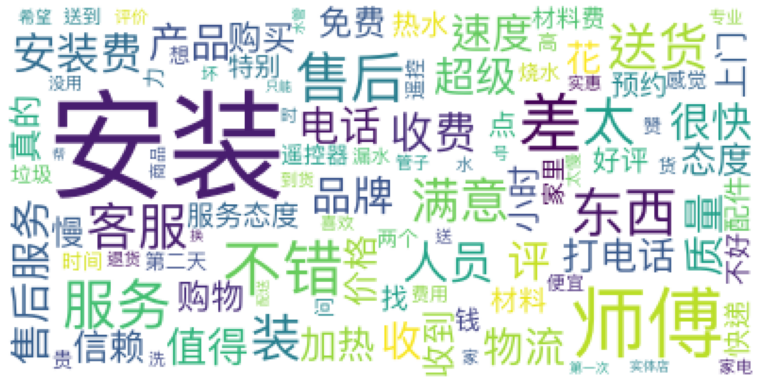

In [233]:
plt.figure(dpi=50)
plt.imshow(wc)
plt.axis('off')
plt.show()

In [234]:
pos_comments = pd.read_csv('tutorial/chapter12/demo/data/正面评价词语（中文）.txt',header=None,sep='\n')
neg_comments = pd.read_csv('tutorial/chapter12/demo/data/负面评价词语（中文）.txt',header=None,sep='\n')
pos_emotions = pd.read_csv('tutorial/chapter12/demo/data/正面情感词语（中文）.txt',header=None,sep='\n')
neg_emotions = pd.read_csv('tutorial/chapter12/demo/data/负面情感词语（中文）.txt',header=None,sep='\n')

In [235]:
positive = set(pos_comments.iloc[:,0])|set(pos_emotions.iloc[:,0])
negative = set(neg_comments.iloc[:,0])|set(neg_emotions.iloc[:,0])

In [236]:
neutral = set(positive) & set(negative)

In [237]:
positive = list(positive - neutral)
negative = list(negative - neutral)

In [238]:
positive = pd.DataFrame({'word':positive,'weight':1})
negative = pd.DataFrame({'word':negative,'weight':-1})

In [239]:
positive.head(),negative.head()

(    word  weight
 0   实际上        1
 1    清纯        1
 2    瞩目        1
 3  黑白分明        1
 4    滑爽        1,
     word  weight
 0    失望       -1
 1    粗劣       -1
 2   疯癫癫       -1
 3    板脸       -1
 4  柔肠百结       -1)

In [240]:
posneg = positive.append(negative)

In [241]:
data_posneg = posneg.merge(result, left_on='word',right_on='word',how='right')

In [242]:
data_posneg[:10]

,word,weight,index_content,nature,content_type,index_word
0,东西,NaN,1,ns,pos,0
1,收到,NaN,1,v,pos,1
2,这么久,NaN,1,r,pos,2
3,忘,NaN,1,v,pos,3
4,好评,1.0,1,v,pos,4
5,品牌,NaN,1,n,pos,5
6,值得,1.0,1,v,pos,6
7,信赖,1.0,1,n,pos,7
8,东西,NaN,1,ns,pos,8
9,整体,NaN,1,n,pos,9


In [243]:
data_posneg = data_posneg.sort_values(by=['index_content','index_word'])

In [244]:
notdict = pd.read_csv('tutorial/chapter12/demo/data/not.csv')

In [245]:
data_posneg['amend_weight'] = data_posneg['weight']

In [246]:
data_posneg['id']=np.arange(0,len(data_posneg))

In [247]:
only_inclination = data_posneg.dropna()

In [248]:
only_inclination[:10]

,word,weight,index_content,nature,content_type,index_word,amend_weight,id
4,好评,1.0,1,v,pos,4,1.0,4
6,值得,1.0,1,v,pos,6,1.0,6
7,信赖,1.0,1,n,pos,7,1.0,7
12,值得,1.0,1,v,pos,12,1.0,12
17,感谢,1.0,2,v,pos,3,1.0,17
19,满意,1.0,3,v,pos,1,1.0,19
30,喜欢,1.0,4,v,pos,10,1.0,30
35,值得,1.0,4,v,pos,15,1.0,35
36,信赖,1.0,4,n,pos,16,1.0,36
37,值得,1.0,4,v,pos,17,1.0,37


In [249]:
only_inclination.index = np.arange(0,len(only_inclination))

In [250]:
only_inclination[:10]

,word,weight,index_content,nature,content_type,index_word,amend_weight,id
0,好评,1.0,1,v,pos,4,1.0,4
1,值得,1.0,1,v,pos,6,1.0,6
2,信赖,1.0,1,n,pos,7,1.0,7
3,值得,1.0,1,v,pos,12,1.0,12
4,感谢,1.0,2,v,pos,3,1.0,17
5,满意,1.0,3,v,pos,1,1.0,19
6,喜欢,1.0,4,v,pos,10,1.0,30
7,值得,1.0,4,v,pos,15,1.0,35
8,信赖,1.0,4,n,pos,16,1.0,36
9,值得,1.0,4,v,pos,17,1.0,37


In [251]:
index = only_inclination['id']

In [252]:
for i in np.arange(0,len(only_inclination)):
    review = data_posneg[data_posneg['index_content'] == only_inclination['index_content'][i]]
    review.index = np.arange(0,len(review))
    affective = only_inclination['index_word'][i]
    if affective == 1:
        ne = sum([ b in notdict['term'] for b in review['word'][affective-1]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = - data_posneg['weight'][index[i]]
    elif affective > 1:
        ne = sum([ b in notdict['term'] for b in review['word'][[affective-1,affective-2]]])
        if ne == 1:
            data_posneg['amend_weight'][index[i]] = - data_posneg['weight'][index[i]]

In [253]:
only_inclination.isna().any()

word             False
weight           False
index_content    False
nature           False
content_type     False
index_word       False
amend_weight     False
id               False
dtype: bool

In [254]:
emotion_value = only_inclination.groupby(['index_content'],as_index=False)['amend_weight'].sum()

In [255]:
emotion_value = emotion_value[emotion_value.amend_weight !=0]

In [256]:
emotion_value['a_type']=''
emotion_value['a_type'][emotion_value.amend_weight > 0] = 'pos'
emotion_value['a_type'][emotion_value.amend_weight < 0] = 'neg'

<ipython-input-256-6db046ac4ae5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_value['a_type'][emotion_value.amend_weight > 0] = 'pos'
<ipython-input-256-6db046ac4ae5>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  emotion_value['a_type'][emotion_value.amend_weight < 0] = 'neg'


In [257]:
result = emotion_value.merge(result,left_on='index_content',right_on='index_content',how='left')

In [258]:
result = result[['index_content','content_type','a_type']].drop_duplicates();

In [259]:
confusion_matrix = pd.crosstab(result['content_type'],result['a_type'],margins=True)

In [260]:
(confusion_matrix.iat[0,0]+confusion_matrix.iat[1,1])/confusion_matrix.iat[2,2]

0.894456289978678

In [261]:
word=pd.read_csv('tutorial/chapter12/demo/tmp/word.csv')

In [262]:
ind_pos = list(emotion_value[emotion_value['a_type']=='pos']['index_content'])
ind_neg = list(emotion_value[emotion_value['a_type']=='neg']['index_content'])

In [263]:
posdata = word[[i in ind_pos for i in word['index_content']]]
negdata = word[[i in ind_neg for i in word['index_content']]]

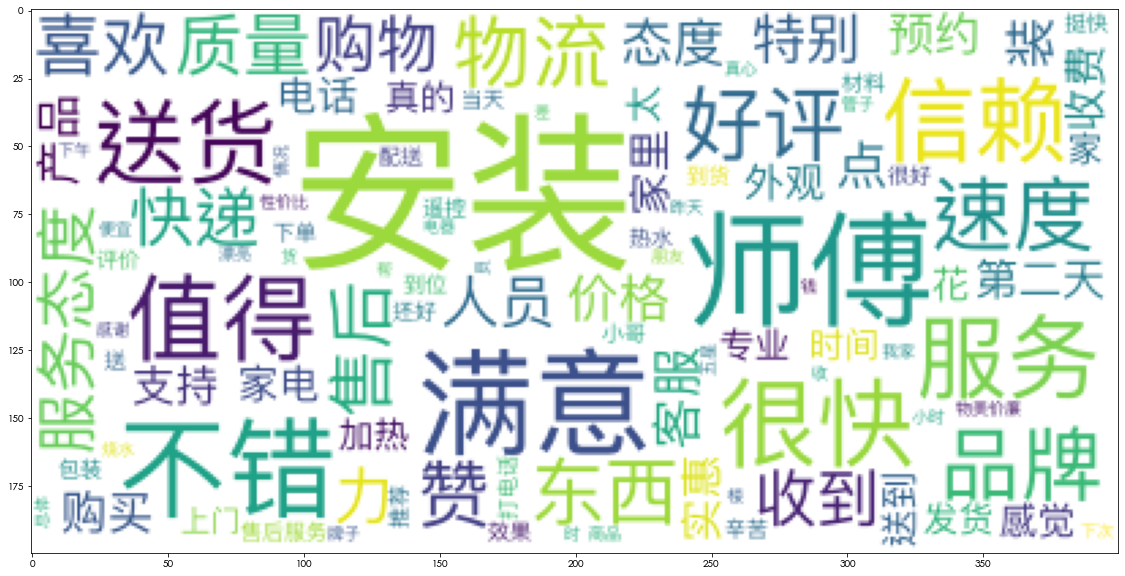

In [264]:
pos_wc = wordcloud.fit_words(posdata.word.value_counts())
plt.imshow(pos_wc)
plt.show()

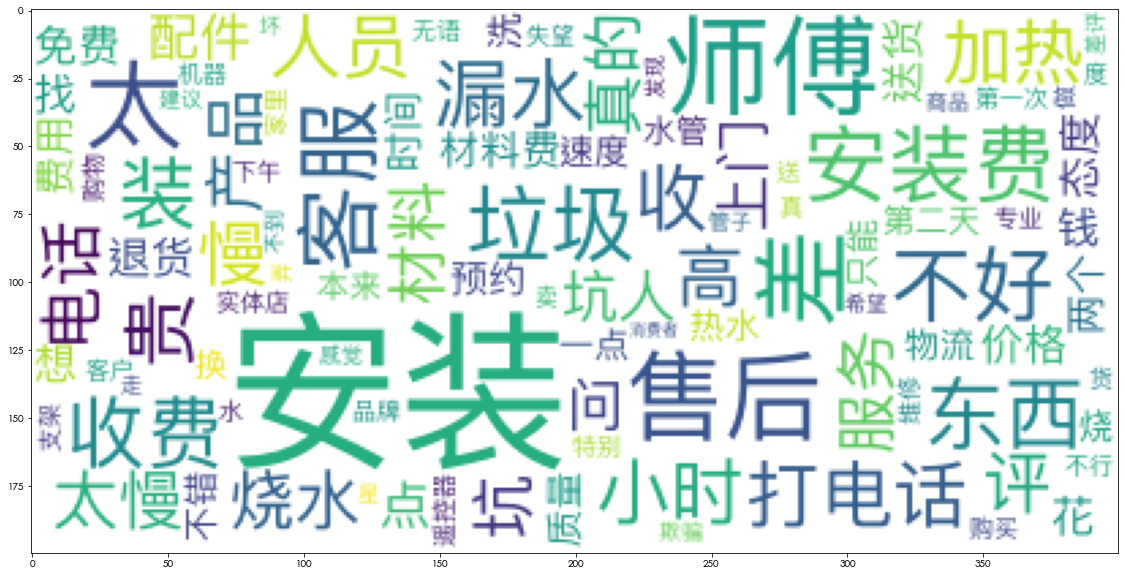

In [265]:
neg_wc = wordcloud.fit_words(negdata.word.value_counts())
plt.imshow(neg_wc)
plt.show()

In [266]:
pos_dict = corpora.Dictionary([[i] for i in posdata['word']])
neg_dict = corpora.Dictionary([[i] for i in negdata['word']])

In [267]:
pos_corpus = [pos_dict.doc2bow(j) for j in [[i] for i in posdata['word']]]
neg_corpus = [neg_dict.doc2bow(j) for j in [[i] for i in negdata['word']]]

In [268]:
pos_lda = models.LdaModel(pos_corpus, num_topics=3, id2word=pos_dict)
neg_lda = models.LdaModel(neg_corpus, num_topics=3, id2word=neg_dict)

In [269]:
pos_lda.print_topics(num_words=10)

[(0,
  '0.139*"安装" + 0.059*"满意" + 0.030*"服务" + 0.024*"很快" + 0.022*"客服" + 0.017*"物流" + 0.016*"购物" + 0.012*"真的" + 0.011*"态度" + 0.011*"收"'),
 (1,
  '0.028*"送货" + 0.022*"值得" + 0.017*"东西" + 0.017*"售后" + 0.014*"太" + 0.012*"家里" + 0.012*"电话" + 0.012*"速度" + 0.011*"装" + 0.010*"预约"'),
 (2,
  '0.047*"师傅" + 0.028*"不错" + 0.025*"好评" + 0.020*"信赖" + 0.019*"人员" + 0.017*"差" + 0.016*"送" + 0.014*"品牌" + 0.013*"质量" + 0.012*"赞"')]

In [270]:
neg_lda.print_topics(num_words=10)

[(0,
  '0.135*"安装" + 0.033*"垃圾" + 0.025*"安装费" + 0.020*"装" + 0.018*"收费" + 0.016*"太慢" + 0.015*"漏水" + 0.013*"人员" + 0.012*"材料" + 0.012*"配件"'),
 (1,
  '0.032*"售后" + 0.031*"太" + 0.019*"收" + 0.018*"打电话" + 0.017*"烧水" + 0.012*"服务" + 0.012*"产品" + 0.011*"上门" + 0.011*"高" + 0.008*"找"'),
 (2,
  '0.031*"师傅" + 0.027*"差" + 0.021*"东西" + 0.020*"客服" + 0.018*"小时" + 0.017*"不好" + 0.016*"贵" + 0.016*"加热" + 0.016*"慢" + 0.012*"坑人"')]